Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

m=100 # data size
X=2*np.random.rand(m,1)
y=4+3*X+np.random.randn(m,1)

X_b=np.c_[np.ones((100, 1)), X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.35080579],
       [2.70928852]])

In [3]:
X_new = np.array([[0], [3]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict=X_new_b.dot(theta_best)
y_predict


array([[ 4.35080579],
       [12.47867135]])

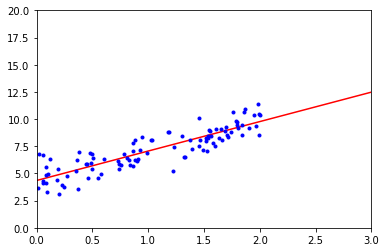

In [4]:
# plot sample and predicted line
plt.plot(X_new, y_predict, "r-") # red line
plt.plot(X, y, "b.") # blue dot
plt.axis([0, 3, 0, 20]) # x:[0,3], y:[0,20]
plt.show()

linear regression (scikit-learn)

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.35080579]), array([[2.70928852]]))

In [6]:
lin_reg.predict(X_new)

array([[ 4.35080579],
       [12.47867135]])

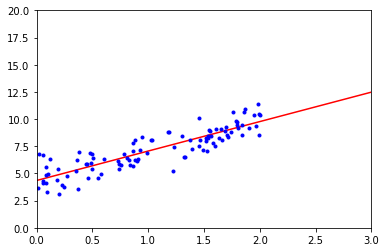

In [7]:
# plot sample and predicted line
plt.plot(X_new, lin_reg.predict(X_new), "r-") # red line
plt.plot(X, y, "b.") # blue dot
plt.axis([0, 3, 0, 20]) # x:[0,3], y:[0,20]
plt.show()

Gradient descent (convergence)

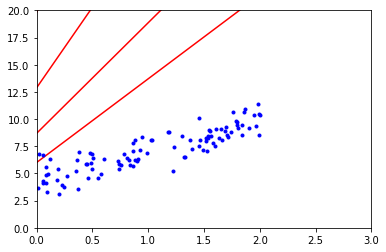

In [10]:
eta=0.5 # learning rate 0.02, 0.1, 0.5
n_iterations = 100
m=100 # data size

theta = np.random.randn(2, 1) # random (normal distribution)

for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta=theta-eta*gradients  
  #theta
  X_new = np.array([[0], [3]])
  X_new_b = np.c_[np.ones((2,1)), X_new]
  y_predict=X_new_b.dot(theta)
  y_predict


  plt.plot(X_new, y_predict, "r-") # red line

plt.plot(X, y, "b.") # blue dot
plt.axis([0, 3, 0, 20]) # x:[0,3], y:[0,20]
plt.show()

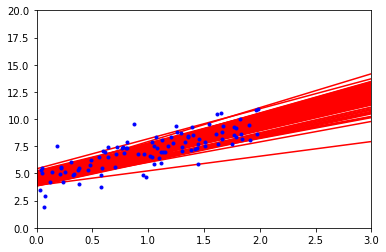

In [0]:
# stochastic gradient descent (SGD)

n_epochs = 50
t0, t1 = 5, 50 # hyper-parameters of learning schedule

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m)
    xi=X_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta=theta-eta*gradients
    #theta
    X_new = np.array([[0], [3]])
    X_new_b = np.c_[np.ones((2,1)), X_new]
    y_predict=X_new_b.dot(theta)
    y_predict
    plt.plot(X_new, y_predict, "r-") # red line

plt.plot(X, y, "b.") # blue dot
plt.axis([0, 3, 0, 20]) # x:[0,3], y:[0,20]
plt.show()

SGDRegressor (scikit-learn)

In [0]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.48021554]), array([2.58833248]))

In [0]:
sgd_reg.predict(X_new)

array([ 4.48021554, 12.24521298])

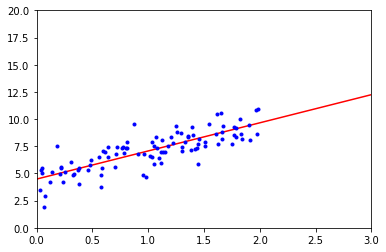

In [0]:
# plot sample and predicted line
plt.plot(X_new, sgd_reg.predict(X_new), "r-") # red line
plt.plot(X, y, "b.") # blue dot
plt.axis([0, 3, 0, 20]) # x:[0,3], y:[0,20]
plt.show()